In [108]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import cv2
from skimage import feature, exposure
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report, auc, \
    log_loss, silhouette_score, adjusted_rand_score, homogeneity_score, completeness_score, v_measure_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.utils import shuffle
from sklearn.cluster import KMeans

In [115]:
# Function to load and preprocess image dataset
def load_and_preprocess_data(root_folder):
    class_labels = []
    images = []
    labels = []
    original_images = []

    # Iterate through each class in the dataset
    for label in os.listdir(root_folder):
        class_path = os.path.join(root_folder, label)
        if os.path.isdir(class_path):
            class_labels.append(label)
            
            # Load and preprocess each image in the class
            for image_file in os.listdir(class_path):
                image_path = os.path.join(class_path, image_file)
                img = cv2.imread(image_path)  # Load image using OpenCV
                img = cv2.resize(img, (128, 128))  # Resize to a common size
                original_images.append(img)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale                
                images.append(img.flatten())  # Flatten the image and add to the list
                labels.append(label)
            
    return  np.array(original_images) ,np.array(images), np.array(labels), class_labels

In [116]:
# Load and preprocess data
root_folder = 'C:\\Users\\youss\\Desktop\\Cats&&dogs'  # Replace with the path to your dataset
X_Org,X, y, class_labels = load_and_preprocess_data(root_folder)

# Use LabelEncoder to convert class names into numeric labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Class Labels Converting Class Names Into Numeric Labels
class_labels_encoded = label_encoder.fit_transform(class_labels)
print(class_labels_encoded)

df = pd.DataFrame(X)
df['Label'] = y
df = shuffle(df).reset_index(drop=True)

X = df.drop(['Label'], axis=1)
y = df['Label']

df.head()
df.tail()

[0 1]


,0,1,2,3,4,5,6,7,8,9,...,16375,16376,16377,16378,16379,16380,16381,16382,16383,Label
6794,145,158,177,181,200,202,203,209,212,214,...,11,28,12,0,10,12,45,36,76,1
6795,166,164,135,210,207,209,232,234,237,239,...,252,254,254,254,254,255,239,220,212,0
6796,206,218,202,161,197,197,163,181,219,129,...,206,219,198,193,207,207,190,199,211,1
6797,20,18,19,19,18,19,19,19,19,18,...,7,7,8,2,3,7,10,4,2,1
6798,207,206,190,199,191,191,203,212,204,179,...,43,22,21,15,13,14,8,5,20,1


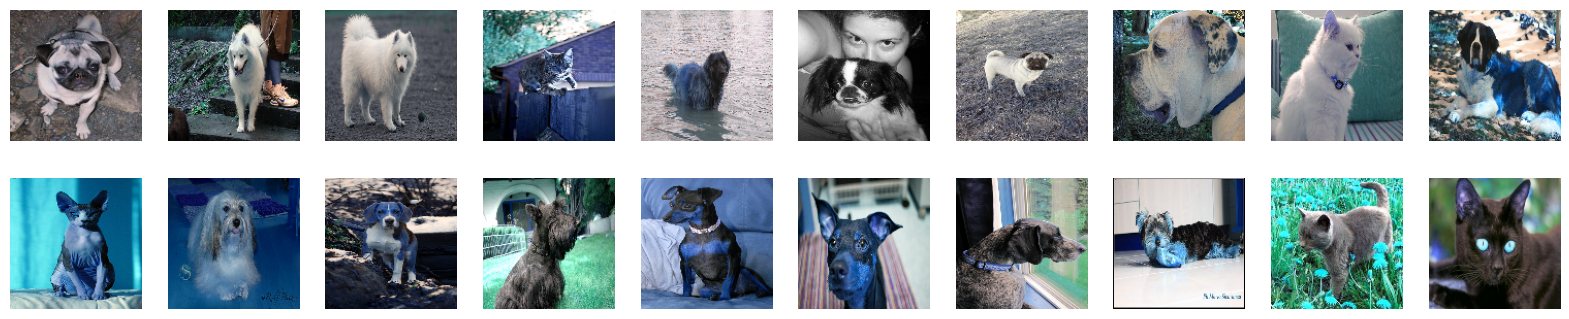

In [117]:
np.random.shuffle(X_Org)

############# Show samples from X_train ##############
X_train_reshaped = X_Org.reshape((-1, 128, 128, 3))

num_samples_to_display = 20

plt.figure(figsize=(20, 4))
for i in range(num_samples_to_display):
    plt.subplot(2, 10, i + 1)
    plt.imshow(X_train_reshaped[i])
    plt.axis('off')

plt.show()

In [118]:
# Split the dataset into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Logistic Regression

# Standardize features
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
# X_test = scaler.transform(X_test)

C:\Users\youss\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[[0.268848   0.26932541 0.27176416 ... 0.34116547 0.33857493 0.33463466]
 [0.58288164 0.58435495 0.58822802 ... 0.53272097 0.53282768 0.52789843]]
(2, 16384)


In [120]:
############# PCA #############
n_components = 50

pca = PCA(n_components=n_components, random_state=42)

X_train_pca = pca.fit_transform(X)


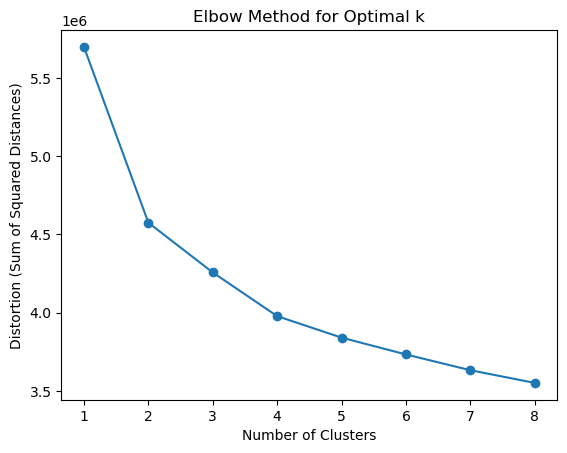

In [121]:
############# Find optimal cluster number ##############
def find_optimal_clusters(data, max_clusters=8):
    distortions = []
    
    for i in range(1, max_clusters + 1):
        kmeans = KMeans(n_init=10, n_clusters=i, init='random', random_state=42, max_iter=100)
        kmeans.fit(data)
        distortions.append(kmeans.inertia_)

    plt.plot(range(1, max_clusters + 1), distortions, marker='o')
    plt.title('Elbow Method for Optimal k')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Distortion (Sum of Squared Distances)')
    plt.show()

find_optimal_clusters(X_train_pca)

In [125]:
############ K-Means ##############
num_clusters = 2

kmeans = KMeans(n_init=10, n_clusters=num_clusters, init='k-means++', random_state=42, max_iter=300)
kmeans.fit(X_train_pca)
y_pred = kmeans.predict(X_train_pca)
labels = kmeans.labels_

kmeans_centroids = kmeans.cluster_centers_
print(kmeans_centroids)
print(kmeans_centroids.shape)

[[-1.21918174e+01  1.05411784e+00  1.06519549e-01  2.12692482e-02
   2.09478384e-01 -1.39551672e-02 -1.48843137e-01  4.45770889e-02
  -1.38630862e-02 -4.84291972e-03 -5.06384457e-02  5.80824583e-03
  -4.79982327e-02  2.07299341e-02 -4.77868026e-02 -1.52743832e-02
  -2.15271089e-02 -1.17672545e-02  2.55150077e-02 -3.48474186e-02
  -1.00793384e-02 -2.26080599e-03 -1.60203588e-03  1.36430314e-03
   2.00942520e-02 -3.13691039e-03 -5.52960990e-03  5.59199540e-03
   1.23939118e-02  8.71878925e-03 -1.16437813e-02 -4.19772313e-03
  -2.79867160e-03 -1.61738910e-02 -6.25841682e-03  5.22318711e-03
  -5.09165616e-03 -1.37158207e-03 -6.47984025e-03 -8.18875245e-04
   1.77433219e-04 -1.64992185e-03  1.89117164e-02  3.51601608e-03
   5.93234964e-03  1.90908596e-03 -5.50441271e-03  1.77964096e-02
   1.31899137e-02 -1.17176150e-02]
 [ 1.34396503e+01 -1.16200684e+00 -1.17421828e-01 -2.34461564e-02
  -2.30918503e-01  1.53834790e-02  1.64077237e-01 -4.91395554e-02
   1.52819735e-02  5.33859271e-03  5.5821

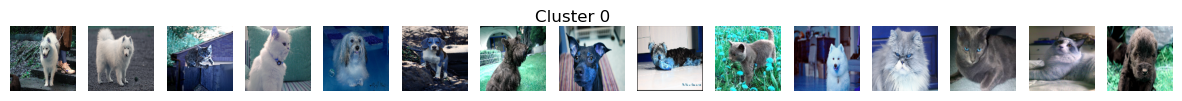

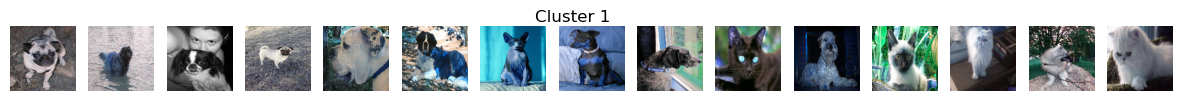

In [123]:
############# Display Samples from each cluster ##############
for i in range(num_clusters):
    cluster_indices = np.where(labels == i)[0]
    plt.figure(figsize=(15, 1))
    for j, index in enumerate(cluster_indices[:15]):
        plt.subplot(1, 15, j + 1)
        plt.imshow(X_Org[index])
        plt.axis('off')
    plt.suptitle(f'Cluster {i}')
    plt.show()

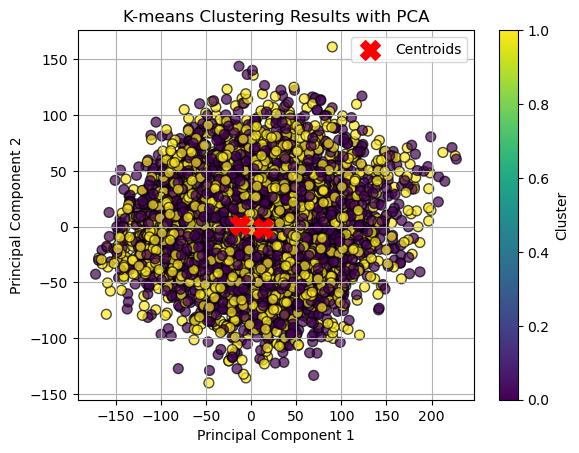

Silhouette Score: 0.1339257791190951
Inertia: 4574616.277795542


In [124]:
# Visualize the results
plt.figure()
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred, cmap='viridis', edgecolors='k', s=50, alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('K-means Clustering Results with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()
#%%

# Evaluate the clustering performance
silhouette_avg = silhouette_score(X, y_pred)
print(f"Silhouette Score: {silhouette_avg}")

inertia = kmeans.inertia_
print(f"Inertia: {inertia}")